In [6]:
using LinearAlgebra, Plots;gr()

Plots.GRBackend()

In [7]:
# Define data
x = range(-2,2,length=401) # spatial coordinate
Nx = size(x,1)

amp1 = 1
x01 = 0.5
sigmay1 = 0.6

amp2 = 1.2
x02 = -0.5
sigmay2 = 0.3

dt = 0.01
Nt = 1001
tend = dt*(Nt-1)
t = range(0,tend,length=Nt) # time

omega1 = 1.3
omega2 = 4.1

y1 = amp1*exp.(-((x.-x01).^2)/(2*sigmay1^2))
y2 = amp2*exp.(-((x.-x02).^2)/(2*sigmay2^2));

In [8]:
Y = zeros(Nx,Nt)
j=1
for tt in t
    Y[:,j] = y1*sin(2*pi*omega1*tt) + y2*sin(2*pi*omega2*tt)
    j+=1
end

In [15]:
y2

401-element Array{Float64,1}:
 4.471983806494405e-6
 5.2800904374126825e-6
 6.227302328058341e-6
 7.336281559645696e-6
 8.633153869770107e-6
 1.0147999162441326e-5
 1.1915405167021297e-5
 1.3975091399055995e-5
 1.6372611242116538e-5
 1.9160140677365694e-5
 2.239736293622472e-5
 2.615245914024364e-5
 3.050321581943915e-5
 ⋮
 1.9830260176939377e-14
 1.519699865891301e-14
 1.1633347164701841e-14
 8.895472114931947e-15
 6.794394620338692e-15
 5.183820829018155e-15
 3.9506326454069635e-15
 3.0074662645743293e-15
 2.286927155121796e-15
 1.7370861148767021e-15
 1.3179769557943071e-15
 9.9887636123774e-16

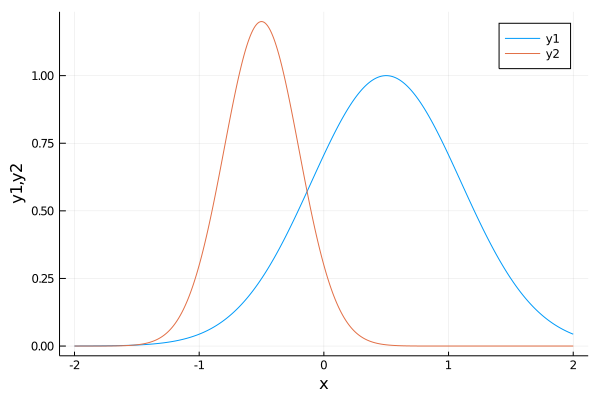

In [20]:
plot(x,y1)
plot!(x,y2,xlabel="x",ylabel="y1,y2")

In [ ]:
# Plot all data
Tgrid,Ygrid = np.meshgrid(t,x)

plt.contour(Ygrid,Tgrid,np.abs(Y))
plt.xlabel('x', fontsize=18)
plt.ylabel('time', fontsize=18)
plt.ylim(0, 2);

In [ ]:
U,S,VT = linalg.svd(Y,full_matrices=False)
print(np.shape(U))
print(np.shape(S))
print(np.shape(VT))

In [ ]:
plt.semilogy(S,'-o')
plt.xlim(0,10)
plt.ylabel('Singular Value', fontsize=18)
plt.xlabel('Index', fontsize=18);

In [ ]:
plt.plot(x,U[:,0])
plt.plot(x,U[:,1])
plt.xlabel('x', fontsize=18)
plt.ylabel('u1(x), u2(x)', fontsize=18)
plt.title('POD modes', fontsize=18);

In [ ]:
plt.plot(t,VT[0,:])
plt.plot(t,VT[1,:])
plt.xlim(0, 4)
plt.xlabel('Time', fontsize=18)
plt.ylabel('a1(t),a2(t)', fontsize=18)
plt.title('Mode coefficients', fontsize=18);

In [ ]:
# Run spectral POD (which here is just a Fourier Transform, as the data is deterministic)
# Note that this requires sufficient resolution in time, and enough snapshots

# Take Fourier transform in time
Yft = np.zeros_like(Y,dtype='complex_')

for j in range(Y.shape[0]):
    Yft[j,:] = np.fft.fft(Y[j,:])
    
freq = np.fft.fftfreq(Nt,d=dt)
plt.contour(x,freq,np.transpose(np.abs(Yft)))
plt.xlabel('x', fontsize=18)
plt.ylabel('frequency (rad/s)', fontsize=18)
plt.title('Spectral content', fontsize=18)
plt.ylim(0,6);

In [ ]:
# Identify indices corresponding to input frequencies
# (we could also find these from the peaks in the above plot if we didn't know these)
ind1 = (np.abs(omega1 - freq)).argmin() 
ind2 = (np.abs(omega2 - freq)).argmin() 
print(freq[ind1])
print(freq[ind2])
plt.plot(x,np.abs(Yft[:,ind1]))
plt.plot(x,np.abs(Yft[:,ind2]))
plt.xlabel('y', fontsize=18)
plt.title('Spectral POD modes');

In [ ]:
# Try DMD instead (Note this doesn't work without time delays or complex data)
A = Y[:,1:Nt-1]@linalg.pinv(Y[:,2:Nt])
#A = np.dot((ModeCoeffs[1:np.shape(ModeCoeffs)[1],0:r]).T,(la.pinv(ModeCoeffs[0:(np.shape(ModeCoeffs)[1]-1),0:r])).T)

Lambda, W = np.linalg.eig(A)
LambdaCts = np.log(Lambda[:2])/(dt)

plt.plot(x,np.real(W[:,0]))
plt.plot(x,np.real(W[:,1]))
plt.xlabel('x', fontsize=18)
print(LambdaCts) # incorrect, since we need four independent components to define two frequencies